# The Sparks Foundation: GRIP JUNE-2021
# Data Science & Business Analytics Intern

## *Author: Tanoj Handal*

## TASK-6: Prediction using Decision Tree Algorithm
**Aim:** Create the Decision Tree classifier and visualize it graphically. The purpose is if we feed any new data to this classifier, it would be able to 
predict the right class accordingly. 

**Dataset:** https://bit.ly/3kXTdox

 # 1)Data Pre-processing

## Importing the required libraries

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

## Importing the Dataset

In [2]:
#Importing Iris dataset

iris_dataset = pd.read_csv("Iris.csv")
print("Iris dataset loaded successfully!!!")

Iris dataset loaded successfully!!!


## Data Exploration

In [3]:
iris_dataset

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
iris_dataset.head()    # display first 5 records/rows from dataset

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
# checking the dimensions of dataset array
iris_dataset.shape

(150, 6)

In [6]:
# checking for null values
iris_dataset.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [7]:
# check for duplicates data
iris_dataset.duplicated().sum()

0

In [8]:
# to get a brief description of dataset
iris_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [9]:
# gives statistical description about Iris dataset
iris_dataset.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [10]:
# get details of unique values in whole dataset
iris_dataset.nunique()

Id               150
SepalLengthCm     35
SepalWidthCm      23
PetalLengthCm     43
PetalWidthCm      22
Species            3
dtype: int64

In [11]:
# checking unique records in species
iris_dataset.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [12]:
# checking total number of records for target variable i.e species
iris_dataset["Species"].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

In [13]:
# Id column is not a real feature. So, I will drop that.
iris_dataset=iris_dataset.drop(['Id'], axis = 1)

# columns in dataset after dropping the feature which is not required
iris_dataset.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

# 2) Visualization of Iris Data

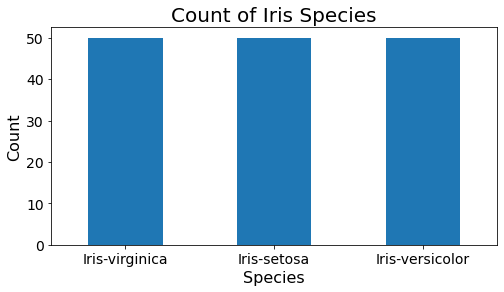

In [14]:
iris_dataset["Species"].value_counts().plot(kind='bar', fontsize=14, figsize=(8,4))
plt.xticks(rotation=0)
plt.title('Count of Iris Species', fontsize=20)
plt.xlabel('Species', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.show()

- As we can see that each class of Species has equal number of data points, so our Iris dataset is said to be Balanced dataset. No Class of Species is fully dominating in this dataset.

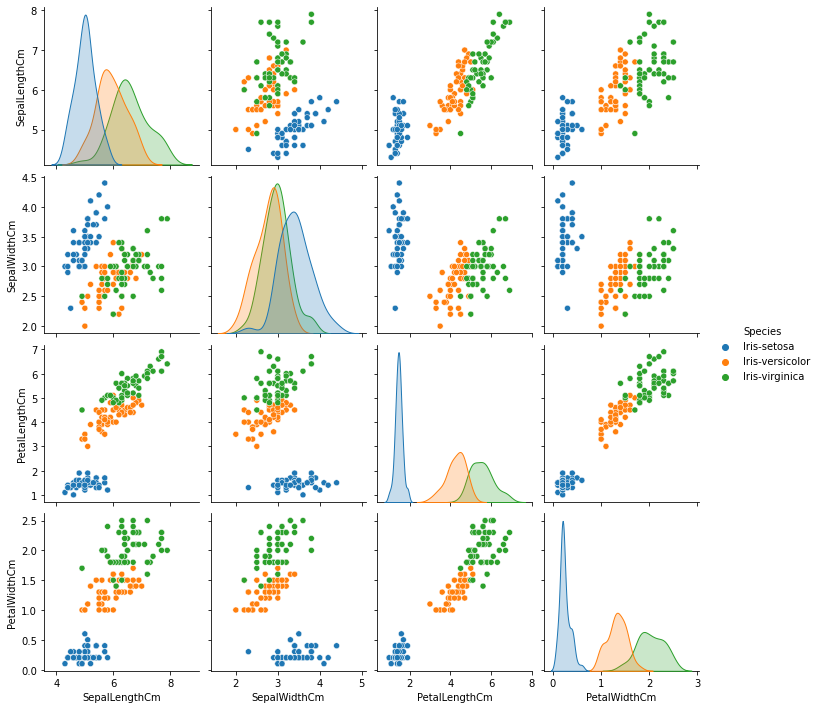

In [15]:
#Plotting pairwise relationships in a dataset
sns.pairplot(iris_dataset, hue = "Species")

<AxesSubplot:>

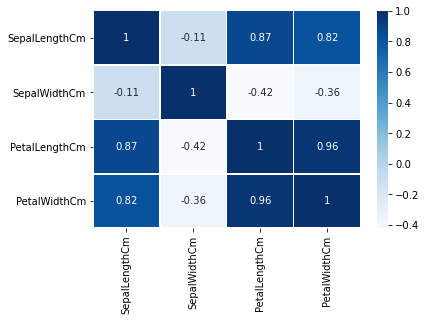

In [16]:
#Plotting pairwise dependency between variables/columns using Heatmap

sns.heatmap(iris_dataset.corr(), cmap = 'Blues', annot = True, linewidth = 0.5)

# 3)  Data Preparation

In [17]:
from sklearn.preprocessing import LabelEncoder

# Encoding the target variable since ML Algo cannot work on string values
Encoder = LabelEncoder()
target = Encoder.fit_transform(iris_dataset['Species'])
print(target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


- Here 0,1,2 represents 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica' respectively.

In [18]:
# Separating independent varibles or target varibles from Iris dataset
feature_cols=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']
x = iris_dataset[feature_cols]   #feature matrix
y = target   #vector of predictions

# 4) Data Splitting

- Now that we have our attributes and labels, the next step is to split this data into training and test data sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [19]:
from sklearn.model_selection import train_test_split

# splitting the data into 67% train and 33% test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=0)

In [20]:
print(iris_dataset.shape)

print("X_train shape=", x_train.shape)
print("Y_train shape=", y_train.shape)
print("X_test shape=", x_test.shape)
print("Y_test shape=", y_test.shape)

(150, 5)
X_train shape= (100, 4)
Y_train shape= (100,)
X_test shape= (50, 4)
Y_test shape= (50,)


# 5) Building Decision Tree Model

In [21]:
from sklearn.tree import DecisionTreeClassifier

# defining and training the Decision Tree Model

# Create Decision Tree classifer object
clf_dtree = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf_dtree.fit(x_train, y_train)

DecisionTreeClassifier()

In [22]:
# Accuracy of training set
clf_dtree.score(x_train,y_train)

1.0

In [23]:
# Making Predictions for test dataset
y_pred = clf_dtree.predict(x_test)
y_pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0,
       0, 1, 2, 2, 2, 2])

In [24]:
# Comparing actual and predicted values of test dataset
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head()

,Actual,Predicted
0,2,2
1,1,1
2,0,0
3,2,2
4,0,0


In [25]:
# Model Evaluation using confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[16,  0,  0],
       [ 0, 18,  1],
       [ 0,  0, 15]], dtype=int64)

# 6) Visualising the Decision Tree

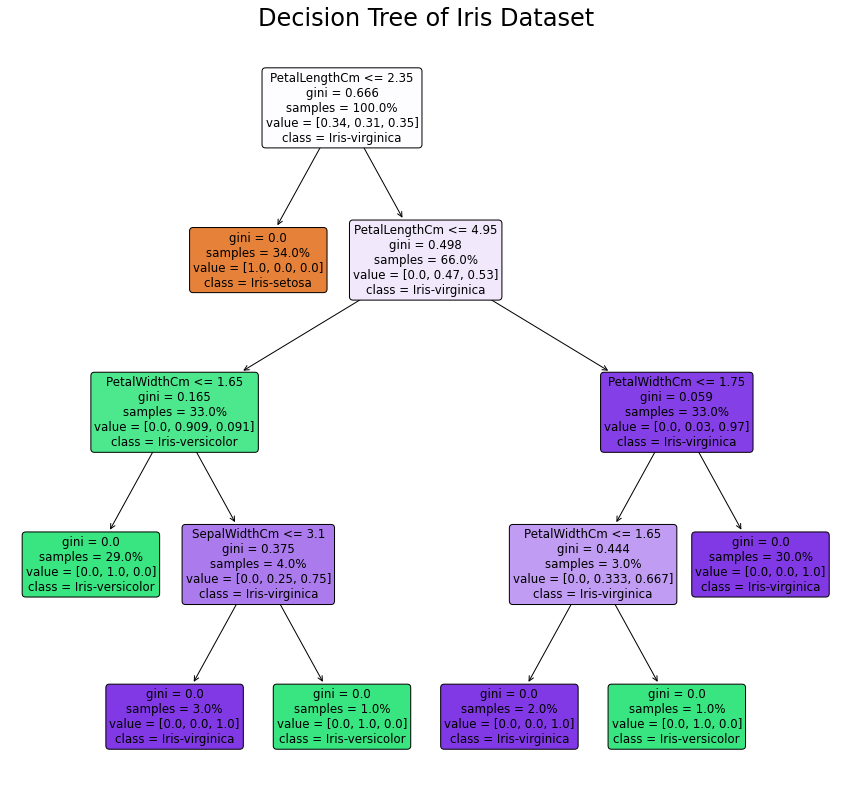

In [26]:
from sklearn import tree

plt.figure(figsize = (15, 14))
tree.plot_tree(clf_dtree, feature_names= feature_cols , class_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], 
               filled = True, precision = 3,proportion =True, rounded = True)
plt.title("Decision Tree of Iris Dataset", fontsize=24)
plt.show()

 - We can now feed any new/test data to this classifer and it would be able to predict the right class of Species accordingly.

## >> Making suitable Predictions with the new data

In [27]:
test_pts = [[5.4,3.0,4.5,1.5],
             [5.1,3.3,1.7,0.5],
             [5.1,2.5,3.0,1.1],
             [6.0,2.7,5.1,1.6],
             [6.8,2.2,5.0,1.5]]

print(clf_dtree.predict(test_pts))

[1 0 1 2 2]


- We can see that the model is able to predict the right class accordingly.

# 7) Evaluating the Model

In [28]:
print("Testing Accuracy of Decision Tree Model = {} %".format(round(clf_dtree.score(x_test,y_test)*100,2)))

Testing Accuracy of Decision Tree Model = 98.0 %


In [29]:
from sklearn import metrics
print('Mean Absolute Error: {}%'.format(round(metrics.mean_absolute_error(y_test, y_pred)*100, 3)))

Mean Absolute Error: 2.0%


# Thank You!